# 2D Regression

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

sys.path.append("../")
import gaupro
import gaupro.kernels as kernels

## Generate some training data

In [3]:
def black_box(x, axis):
    """
    Bimodal gaussian
    """
    
    sigma1 = 2
    sigma2 = 1
    mu1 = 1
    mu2 = -1
    mode1 = np.exp(-np.linalg.norm(x - mu1, axis=axis) / sigma1)
    mode2 = np.exp(-np.linalg.norm(x - mu2, axis=axis) / sigma2)
    return mode1 + mode2

In [8]:
x_lim = [-3, 3]
n_train = 25
x_train = (x_lim[1] - x_lim[0]) * np.random.random((n_train, 2)).T + x_lim[0]
f_train = black_box(x_train, axis=0)

## Pick some points for evaluation

In [9]:
n_test_x = 20
n_test_y = 20

x_test_x = np.linspace(x_lim[0], x_lim[1], n_test_x).reshape((1, n_test_x))
x_test_y = np.linspace(x_lim[0], x_lim[1], n_test_y).reshape((1, n_test_y))

X, Y = np.meshgrid(x_test_x, x_test_y)
X_vec = np.resize(X, (1, n_test_x * n_test_y))
Y_vec = np.resize(Y, (1, n_test_x * n_test_y))

x_test = np.concatenate((X_vec, Y_vec), axis=0)

## Fit and Evaluate Gaussian Process

In [10]:
model = gaupro.Regressor(kernels.se_kernel(1.0))

model.fit(x_train, f_train)
mu, cov = model.predict(x_test)
mu = mu.reshape((n_test_x, n_test_y))

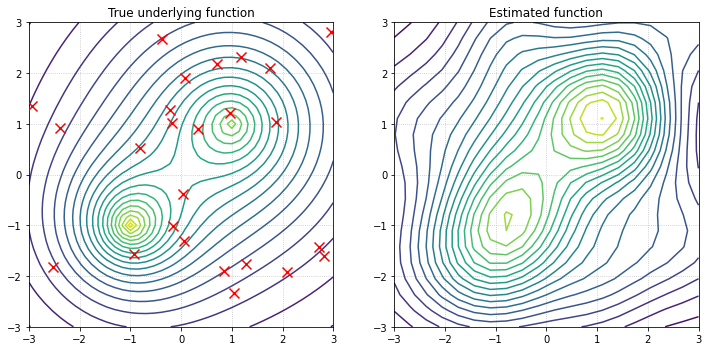

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# objective
no = 40
Xo, Yo = np.meshgrid(np.linspace(x_lim[0], x_lim[1], no), np.linspace(x_lim[0], x_lim[1], no))
grid = np.empty((Xo.shape[0], Xo.shape[0], 2))
grid[:, :, 0] = Xo
grid[:, :, 1] = Yo
Zo = black_box(grid, axis=2)

ax[0].contour(Xo, Yo, Zo, 20)  # True function
ax[0].scatter(x_train[0, :], x_train[1, :], marker='x', c='r', s=100, zorder=10)  # Train samples
ax[0].axis('square')
ax[0].grid(linestyle=':', alpha=0.8, markevery=20)
ax[0].set_title("True underlying function")

# Test points evaluation
ax[1].contour(X, Y, mu, 20)
ax[1].axis('square')
ax[1].grid(linestyle=':', alpha=0.8, markevery=20)
ax[1].set_title("Estimated function")

plt.show()